<a href="https://colab.research.google.com/github/Bhuvan-Arora-1313/youtube-comment-sentiment-analysis-NLP-/blob/main/NLP_Youtube_Comment_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
atifaliak_youtube_comments_dataset_path = kagglehub.dataset_download('atifaliak/youtube-comments-dataset')

print('Data source import complete.')

Data source import complete.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/kaggle/input/youtube-comments-dataset/YoutubeCommentsDataSet.csv')

data

Comment Sentiment
0      lets not forget that apple pay in 2014 require...   neutral
1      here in nz 50 of retailers don’t even have con...  negative
2      i will forever acknowledge this channel with t...  positive
3      whenever i go to a place that doesn’t take app...  negative
4      apple pay is so convenient secure and easy to ...  positive
...                                                  ...       ...
18403  i really like the point about engineering tool...  positive
18404  i’ve just started exploring this field and thi...  positive
18405  excelente video con una pregunta filosófica pr...   neutral
18406  hey daniel just discovered your channel a coup...  positive
18407  this is great focus is key a playful approach ...  positive

[18408 rows x 2 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18408 entries, 0 to 18407
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    18364 non-null  object
 1   Sentiment  18408 non-null  object
dtypes: object(2)
memory usage: 287.8+ KB


In [ ]:
data['Comment']=data['Comment'].astype(str)

In [ ]:
 #Create quick lambda functions to find the polarity and subjectivity of each routine

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['Comment'].apply(pol)
data['subjectivity'] = data['Comment'].apply(sub)
data

Comment Sentiment  polarity  \
0      lets not forget that apple pay in 2014 require...   neutral  0.075606   
1      here in nz 50 of retailers don’t even have con...  negative  0.160000   
2      i will forever acknowledge this channel with t...  positive  0.000000   
3      whenever i go to a place that doesn’t take app...  negative -0.195238   
4      apple pay is so convenient secure and easy to ...  positive  0.208333   
...                                                  ...       ...       ...   
18403  i really like the point about engineering tool...  positive  0.344048   
18404  i’ve just started exploring this field and thi...  positive  0.333333   
18405  excelente video con una pregunta filosófica pr...   neutral -0.800000   
18406  hey daniel just discovered your channel a coup...  positive  0.000000   
18407  this is great focus is key a playful approach ...  positive  0.470000   

       subjectivity  
0          0.657576  
1          0.540000  
2          0.000000  
3          0.559099  
4          0.394048  
...             ...  
18403      0.379762  
18404      0.366667  
18405      1.000000  
18406      0.000000  
18407      0.780000  

[18408 rows x 4 columns]

In [ ]:
import matplotlib.pyplot as plt

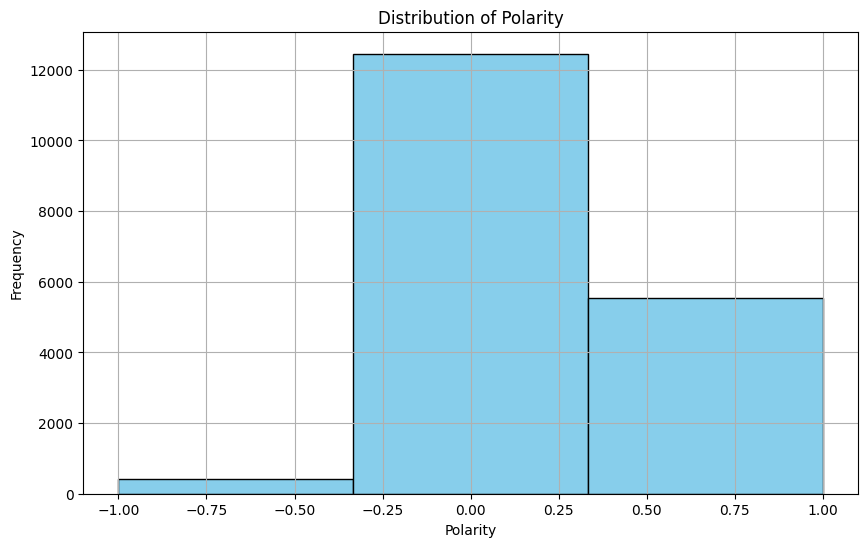

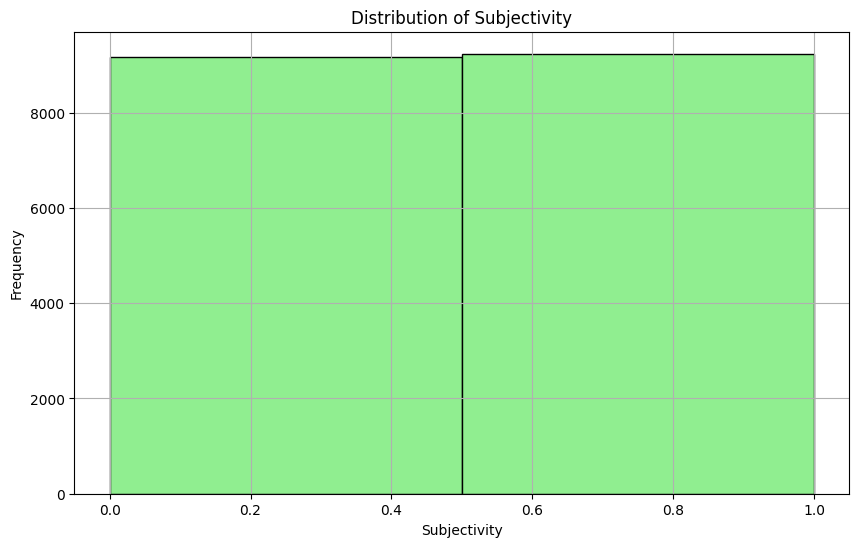

In [ ]:
# Plot Polarity
plt.figure(figsize=(10, 6))
plt.hist(data['polarity'], bins=3, color='skyblue', edgecolor='black')
plt.title('Distribution of Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot Subjectivity
plt.figure(figsize=(10, 6))
plt.hist(data['subjectivity'], bins=2, color='lightgreen', edgecolor='black')
plt.title('Distribution of Subjectivity')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
data['Sentiment'] = data['Sentiment'].replace({-1: 'negative', 0: 'neutral', 1: 'positive'})

In [ ]:
# Drop rows with missing values
data.dropna(subset=['Comment', 'Sentiment'], inplace=True)
data

Comment Sentiment  polarity  \
0      lets not forget that apple pay in 2014 require...   neutral  0.075606   
1      here in nz 50 of retailers don’t even have con...  negative  0.160000   
2      i will forever acknowledge this channel with t...  positive  0.000000   
3      whenever i go to a place that doesn’t take app...  negative -0.195238   
4      apple pay is so convenient secure and easy to ...  positive  0.208333   
...                                                  ...       ...       ...   
18403  i really like the point about engineering tool...  positive  0.344048   
18404  i’ve just started exploring this field and thi...  positive  0.333333   
18405  excelente video con una pregunta filosófica pr...   neutral -0.800000   
18406  hey daniel just discovered your channel a coup...  positive  0.000000   
18407  this is great focus is key a playful approach ...  positive  0.470000   

       subjectivity  
0          0.657576  
1          0.540000  
2          0.000000  
3          0.559099  
4          0.394048  
...             ...  
18403      0.379762  
18404      0.366667  
18405      1.000000  
18406      0.000000  
18407      0.780000  

[18408 rows x 4 columns]

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.svm import SVC

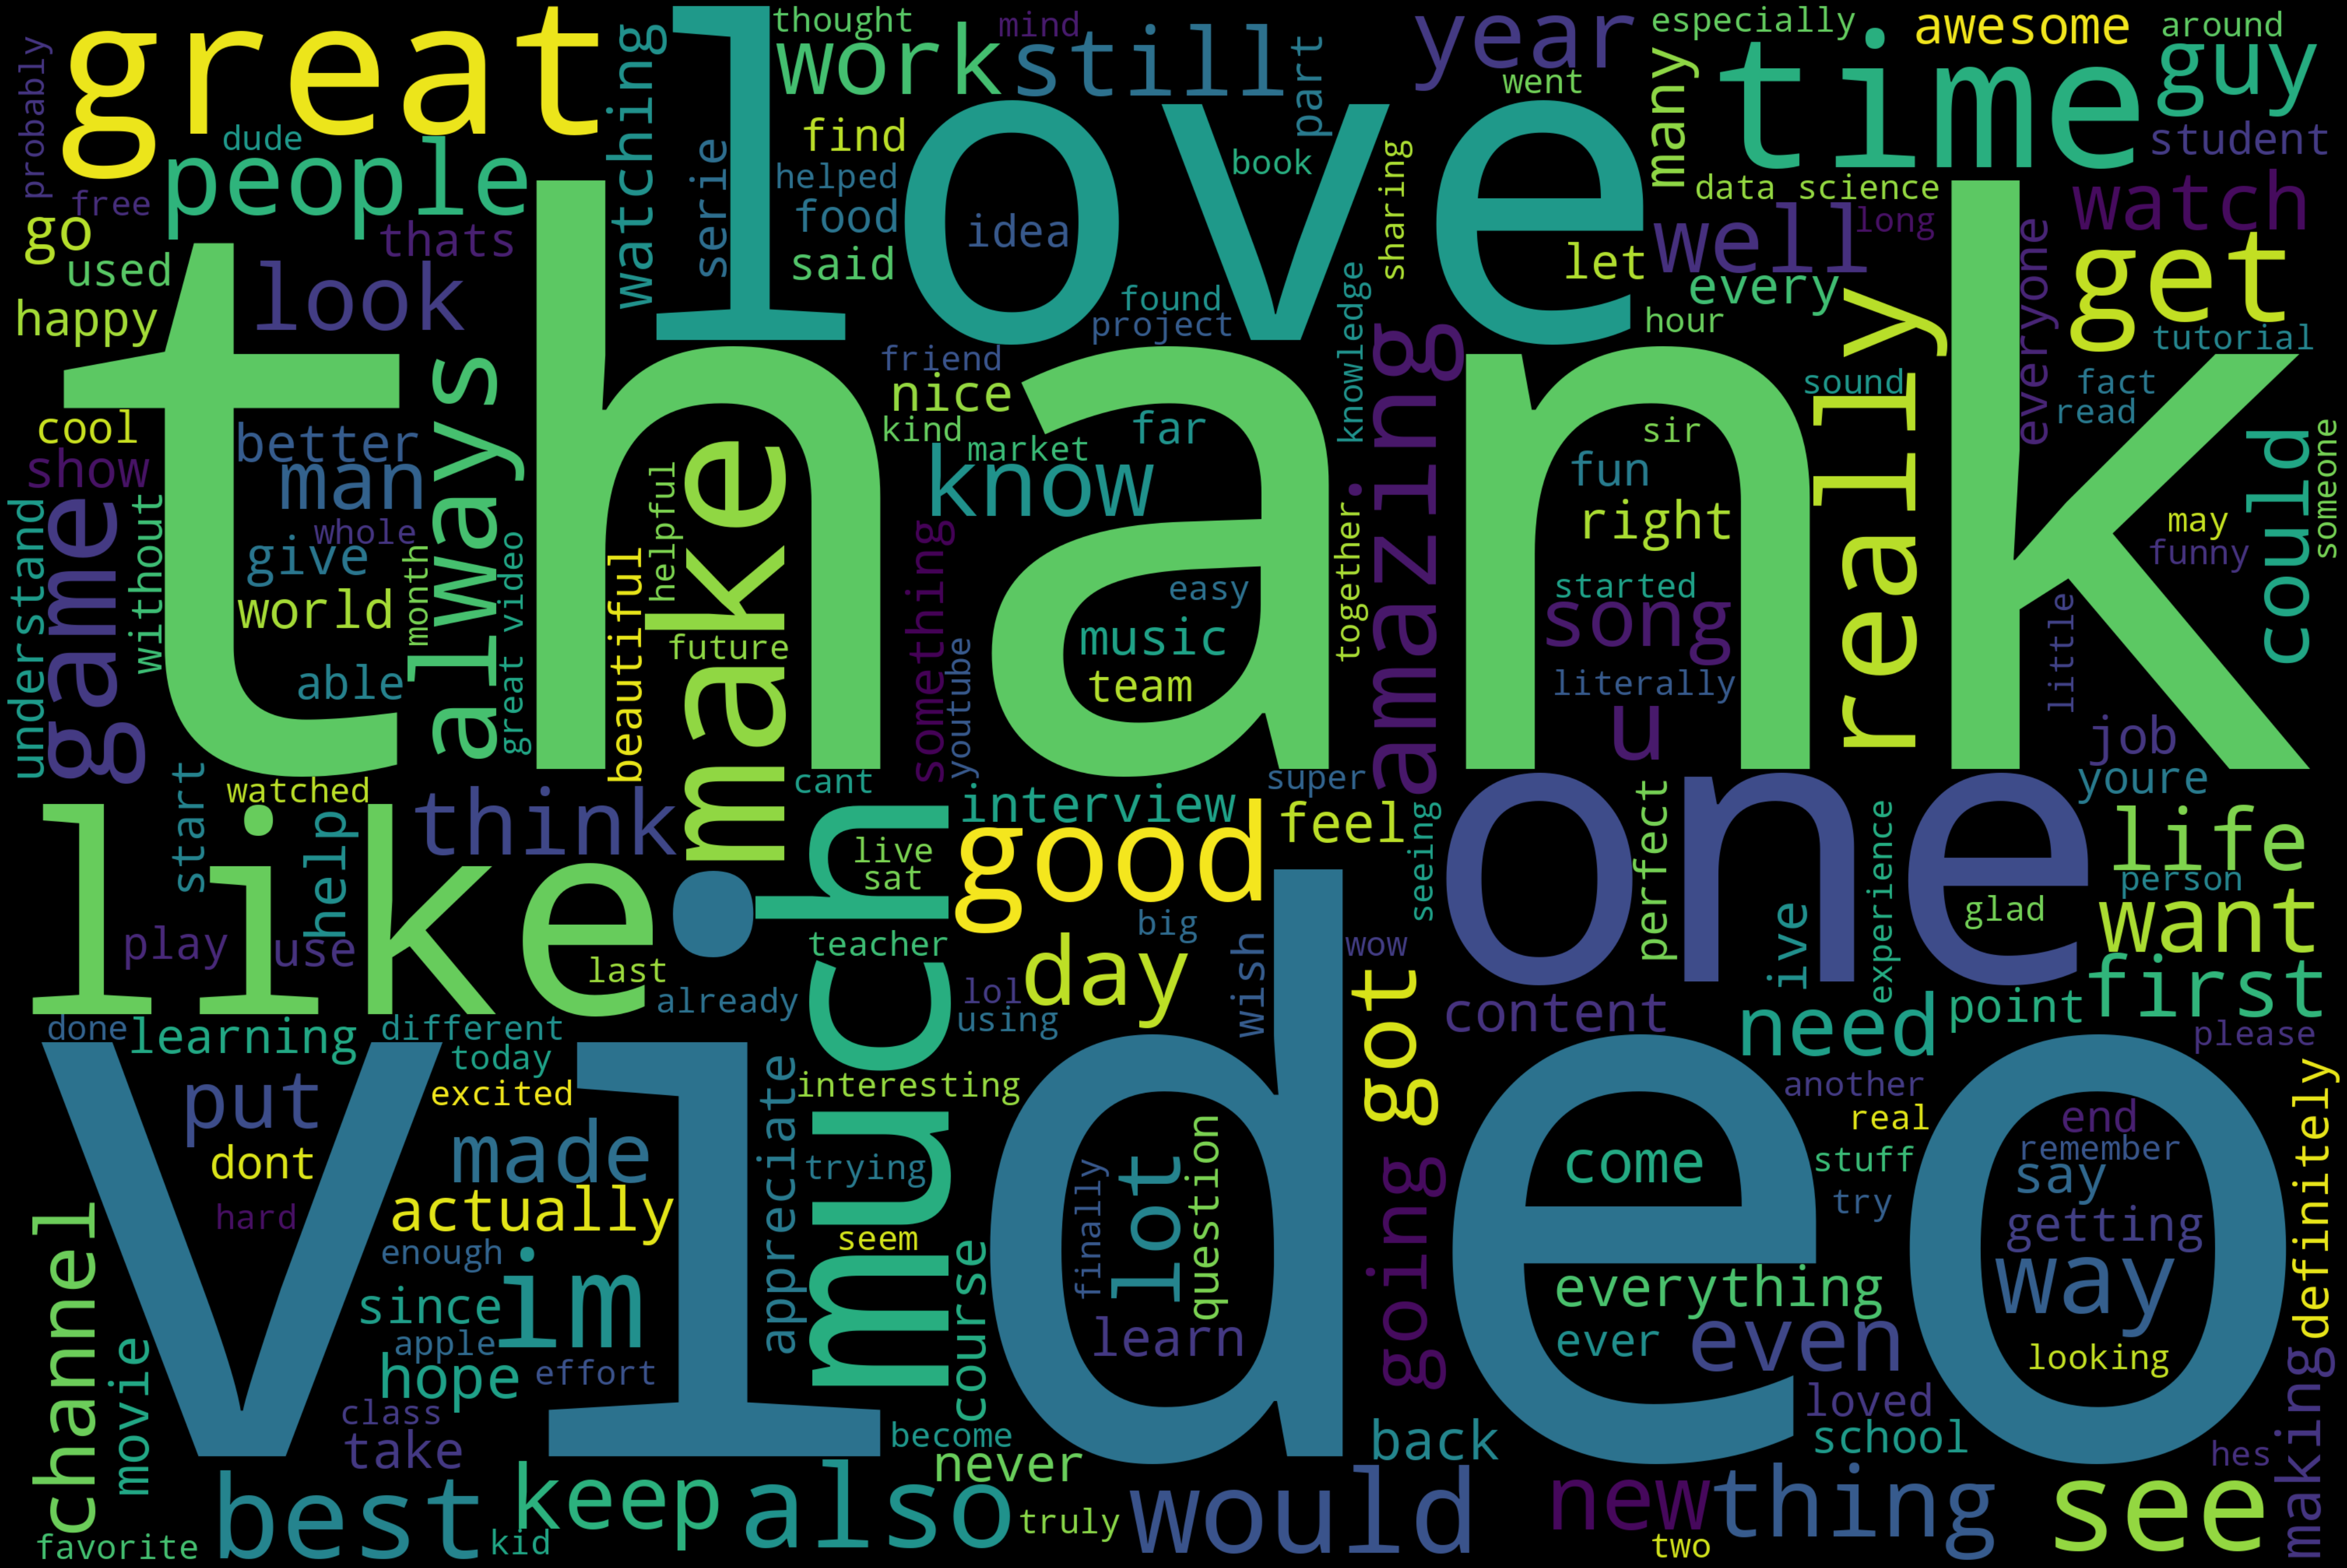

In [ ]:
text = ''

for comment in data[data['Sentiment'] == "positive"]['Comment']:
    text += f" {comment}"

wordcloud = WordCloud(
width=3000, height=2000, background_color='black',
stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)

fig = plt.figure(figsize=(40,30), facecolor='k',edgecolor='k')

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

del text

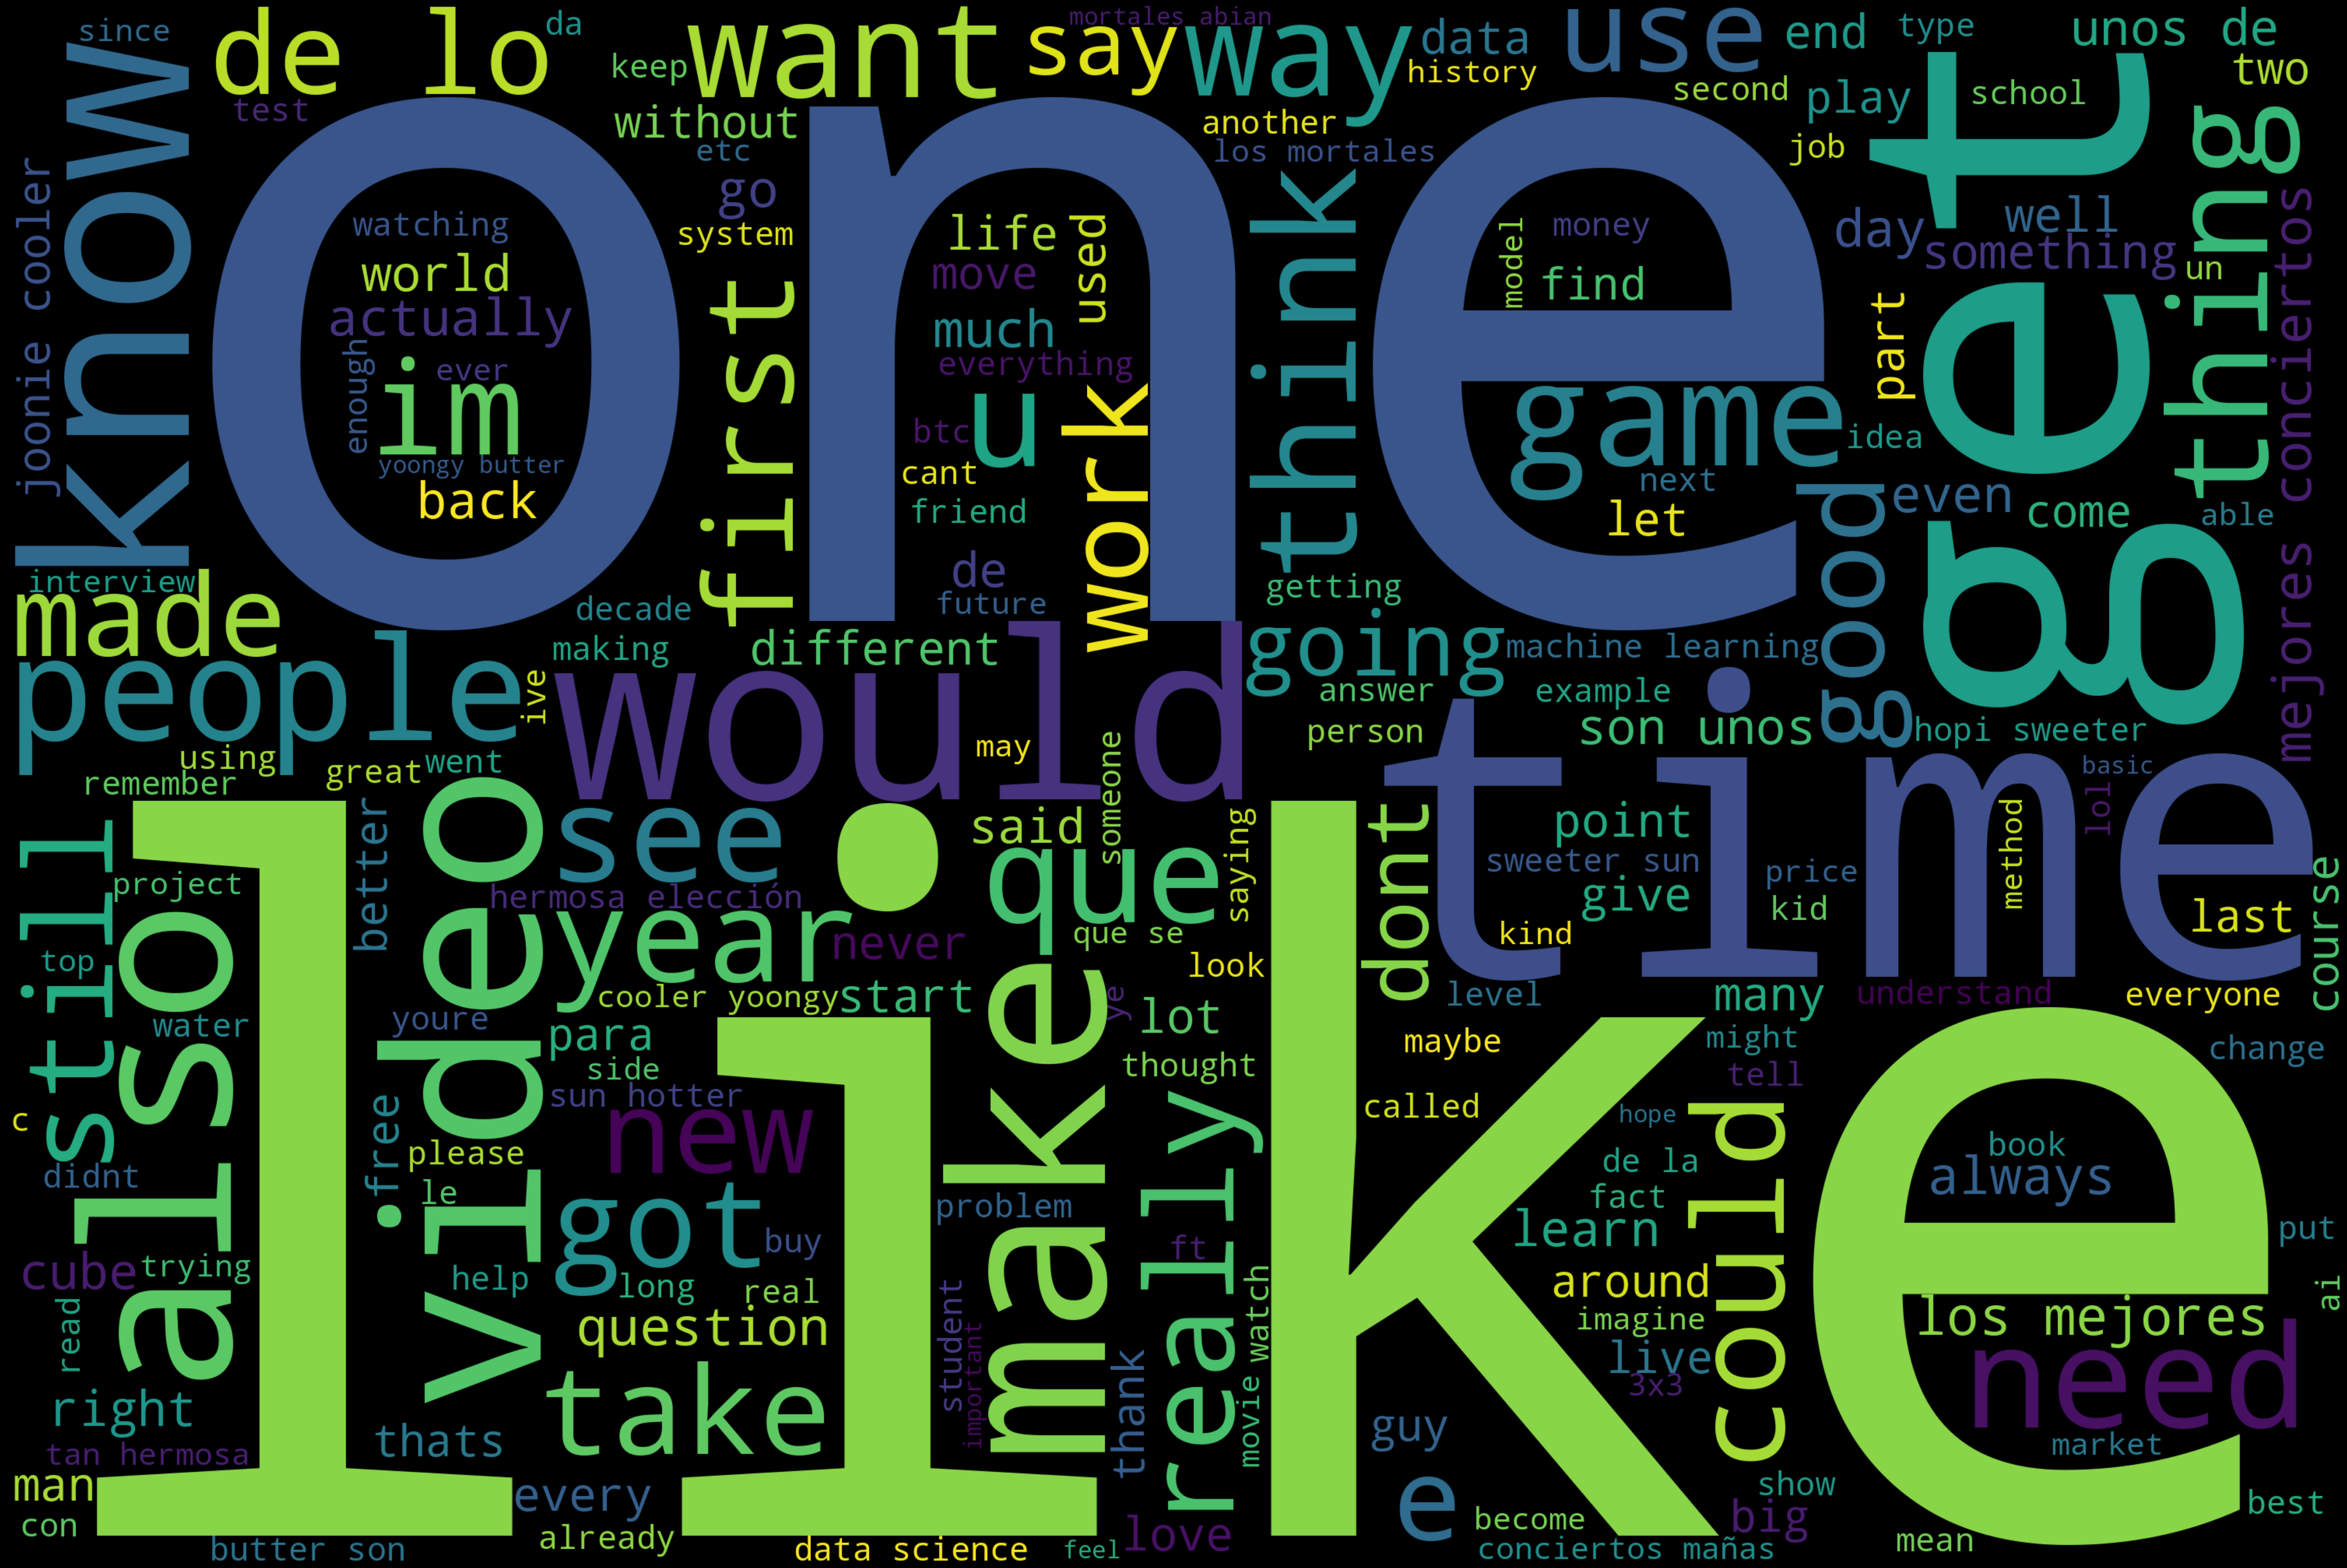

In [ ]:
text = ''

for comment in data[data['Sentiment'] == "neutral"]['Comment']:
    text += f" {comment}"

wordcloud = WordCloud(
width=3000, height=2000, background_color='black',
stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)

fig = plt.figure(figsize=(40,30), facecolor='k',edgecolor='k')

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

del text

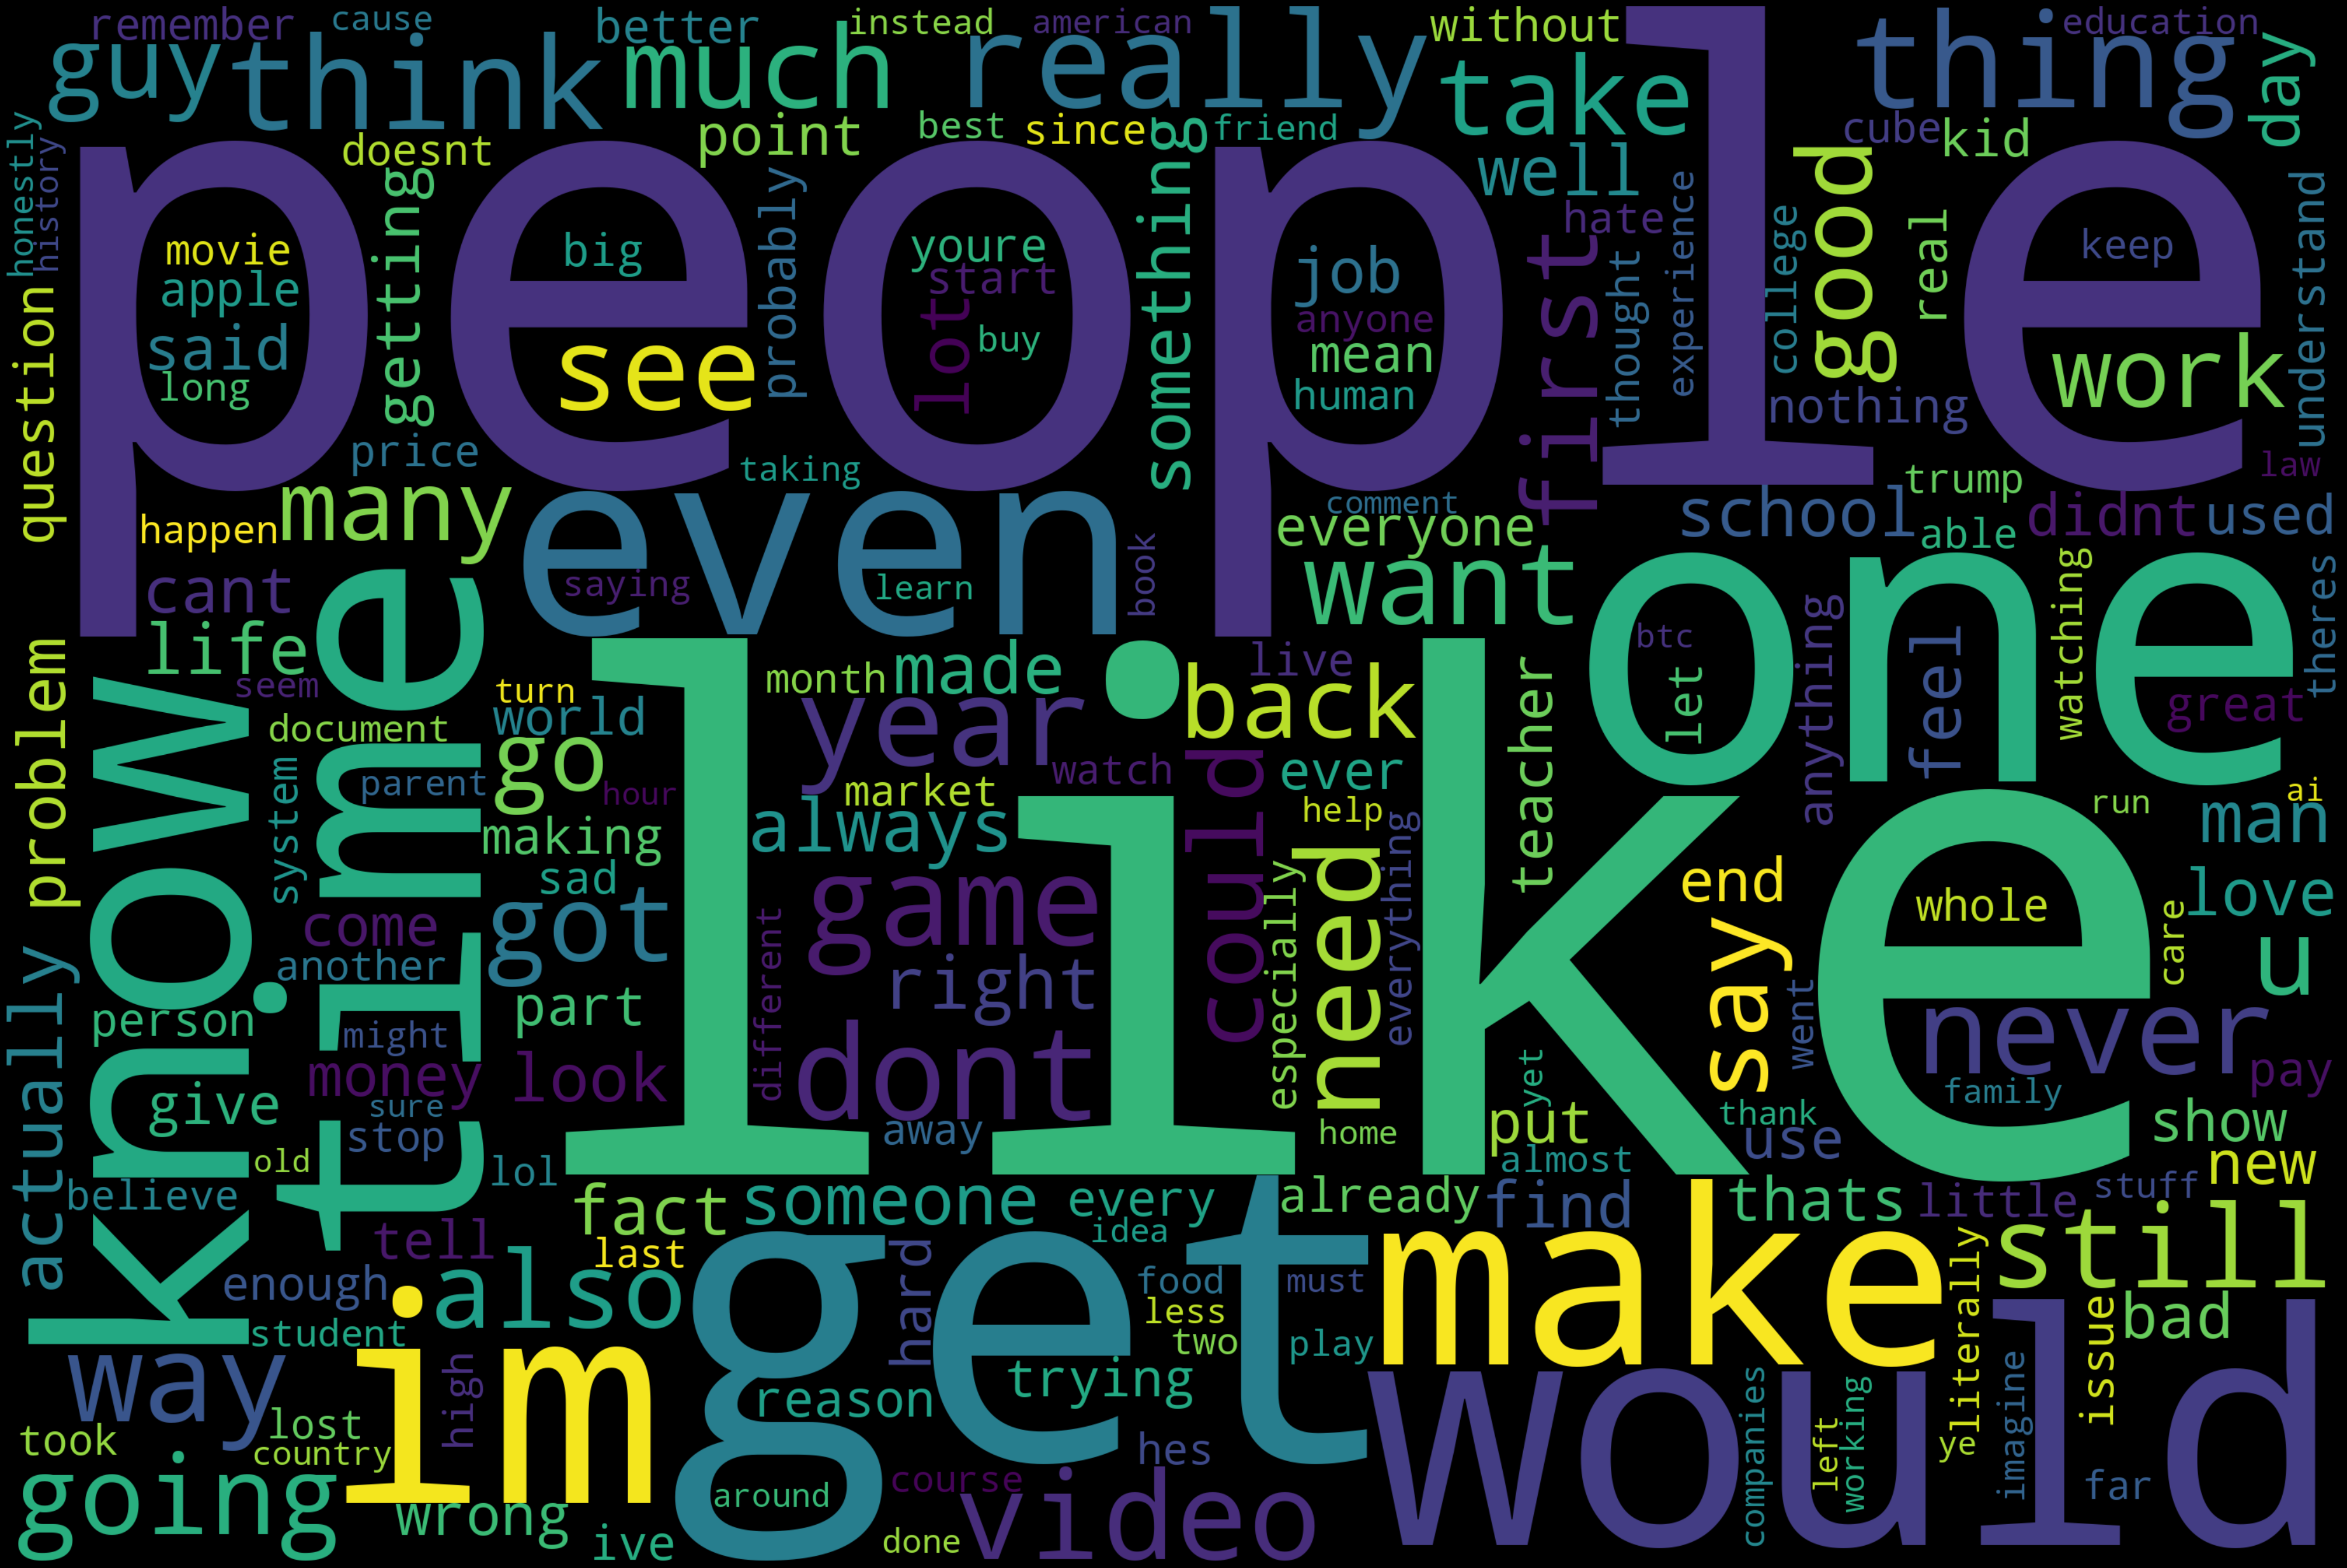

In [ ]:
text = ''

for comment in data[data['Sentiment'] == "negative"]['Comment']:
    text += f" {comment}"

wordcloud = WordCloud(
width=3000, height=2000, background_color='black',
stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)

fig = plt.figure(figsize=(40,30), facecolor='k',edgecolor='k')

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

del text

In [ ]:
# Display some stats
print(data['Sentiment'].value_counts())

Sentiment
positive    11432
neutral      4638
negative     2338
Name: count, dtype: int64


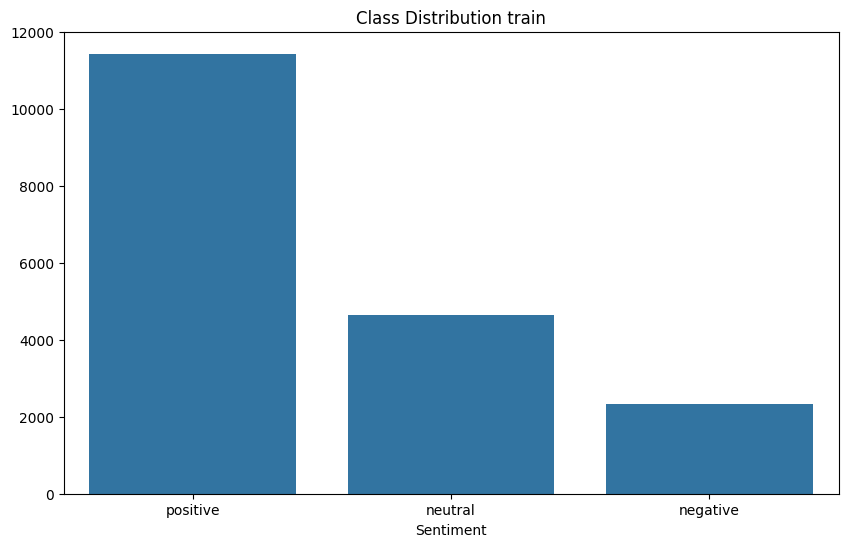

In [ ]:
dist = data['Sentiment'].value_counts()
def distribution_plot(x, y, name):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x, y=y)
    plt.title(name)
    plt.show()

distribution_plot(x=dist.index, y=dist.values, name='Class Distribution train')

In [ ]:
#Using TF-IDF for text vectorization and logistic regression for model training
# Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['Comment'])

# Encode target labels (category) directly into numeric values
y = data['Sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression classifier
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predict on test set
y_pred = lr.predict(X_test)
print(y_pred, y_test)
# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

[1 2 1 ... 2 1 2] 7270     2
15906    2
4373     2
14012    2
17702    2
        ..
14029    2
10994    1
4502     2
4031     1
1005     2
Name: Sentiment, Length: 3682, dtype: int64
Accuracy: 0.7555676262900598
F1 Score: 0.7402448065877696
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.32      0.43       475
           1       0.64      0.60      0.62       937
           2       0.81      0.91      0.86      2270

    accuracy                           0.76      3682
   macro avg       0.69      0.61      0.63      3682
weighted avg       0.74      0.76      0.74      3682

Confusion Matrix:
 [[ 153  149  173]
 [  59  562  316]
 [  30  173 2067]]


In [ ]:
#Training the model with Naive Bayes
# Train a Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predict on test set
y_pred_nb = nb.predict(X_test)

# Evaluate the classifier
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes F1 Score:", f1_score(y_test, y_pred_nb, average='weighted'))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.6730038022813688
Naive Bayes F1 Score: 0.6079087285638308
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.13      0.22       475
           1       0.70      0.25      0.37       937
           2       0.67      0.96      0.79      2270

    accuracy                           0.67      3682
   macro avg       0.72      0.45      0.46      3682
weighted avg       0.69      0.67      0.61      3682

Naive Bayes Confusion Matrix:
 [[  60   20  395]
 [  11  235  691]
 [   4   83 2183]]
